#**OLYMPICS DATA ANALYSIS**

In [1]:
import pandas as pd

***Reading the csv file***

In [2]:
df = pd.read_csv('/content/summer.csv')

In [3]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [4]:
df.columns

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender',
       'Event', 'Medal'],
      dtype='object')

## **1. In how many cities Summer Olympics is held so far?**

In [5]:
len(df['City'].unique())

22


## **2. Which sport is having most number of Gold Medals so far?**

***Creating a dataframe consisting of only Gold medalists***

In [6]:
Gold_medals = df[df['Medal']=='Gold']

In [7]:
Gold_medals.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold
13,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold


In [8]:
Gold_medals['Medal'].replace({'Gold':1},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [9]:
Gold_medals.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,1
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,1
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,1
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,1
13,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,1


***Grouping them on sports***

In [10]:
m = Gold_medals.groupby('Sport')['Medal'].count().sort_values(ascending=False)
m.head()

Sport
Aquatics      1421
Athletics     1215
Rowing         890
Gymnastics     820
Fencing        552
Name: Medal, dtype: int64

In [11]:
n=Gold_medals.groupby('Sport')['Medal'].count()

***Plotting Top 5***

Text(0, 0.5, 'No of Gold Medals')

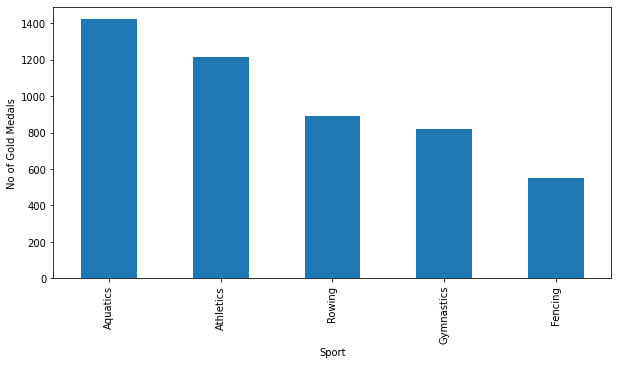

In [12]:
ax = m.head().plot.bar(x='Sport', y='n',figsize=(10,5))
ax.set_ylabel("No of Gold Medals")

## **3. Which sport is having most number of medals so far?**

***Creating a copy of original dataframe***

In [13]:
medal_count = df.copy(deep=True)

In [14]:
medal_count.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


***To get count of medals replacing values by 1***

In [15]:
medal_count['Medal'].replace({'Gold':1,'Silver':1,'Bronze':1},inplace=True)

In [16]:
medal_count.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,1
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,1
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,1
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,1
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,1


In [17]:
med = medal_count.groupby('Sport')['Medal'].count().sort_values(ascending=False)
med.head()

Sport
Aquatics      4170
Athletics     3638
Rowing        2667
Gymnastics    2307
Fencing       1613
Name: Medal, dtype: int64

In [18]:
n = medal_count.groupby('Sport')['Medal'].count()

***Plotting Top 5***

Text(0, 0.5, 'No of Medals')

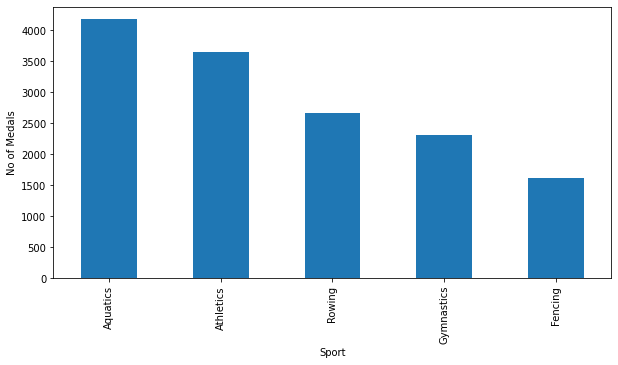

In [19]:
bx = med.head().plot.bar(x='Sport', y='n',figsize=(10,5))
bx.set_ylabel("No of Medals")

## **4. Which player has won most number of medals?**

***Using medal_count dataframe and grouping based on players***

In [20]:
ath= medal_count.groupby('Athlete')['Medal'].count().sort_values(ascending=False)
print("Top 5 athletes with highest number of medals")
ath.head()

Top 5 athletes with highest number of medals


Athlete
PHELPS, Michael         22
LATYNINA, Larisa        18
ANDRIANOV, Nikolay      15
MANGIAROTTI, Edoardo    13
SHAKHLIN, Boris         13
Name: Medal, dtype: int64

In [21]:
m = medal_count.groupby('Athlete')['Medal'].count()

***Plotting Top 5***

Text(0, 0.5, 'No of Medals')

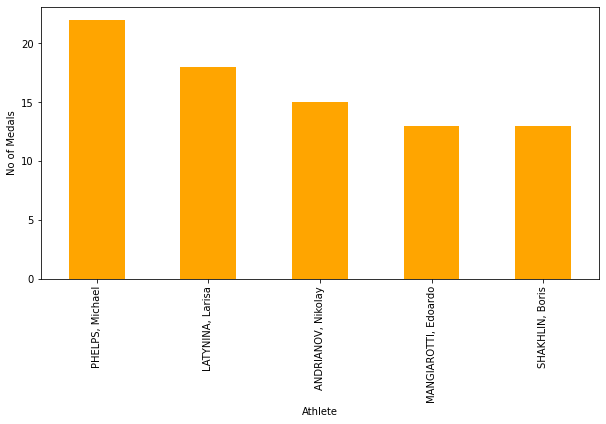

In [22]:
cx = ath.head().plot.bar(x='Athlete', y='m',figsize=(10,5),color='Orange')
cx.set_ylabel('No of Medals')

## **5. Which player has won most number Gold Medals of medals?**

***Using Gold_medals dataframe and grouping based on players***

In [23]:
gmed = Gold_medals.groupby('Athlete')['Medal'].count().sort_values(ascending=False)
gmed.head()

Athlete
PHELPS, Michael     18
NURMI, Paavo         9
SPITZ, Mark          9
LEWIS, Carl          9
LATYNINA, Larisa     9
Name: Medal, dtype: int64

In [24]:
p = Gold_medals.groupby('Athlete')['Medal'].count()

***Plotting Top 5***

Text(0, 0.5, 'No of Gold medals')

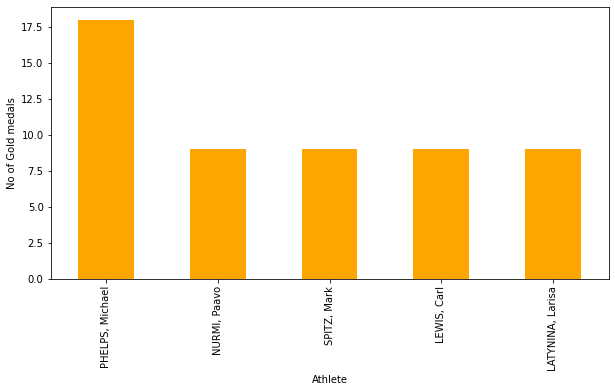

In [25]:
dx = gmed.head().plot.bar(x='Athlete',y='p',figsize=(10,5),color='Orange')
dx.set_ylabel('No of Gold medals')

# **6. In which year India won first Gold Medal in Summer Olympics?**

***Creating a dataframe for India***

In [26]:
India = df[df['Country']=='IND']

In [27]:
India[India['Medal'] == 'Gold'].head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold
5513,1928,Amsterdam,Hockey,Hockey,"CHAND, Dyan",IND,Men,Hockey,Gold
5514,1928,Amsterdam,Hockey,Hockey,"GATELEY, Maurice A.",IND,Men,Hockey,Gold
5515,1928,Amsterdam,Hockey,Hockey,"GILL, K. S.",IND,Men,Hockey,Gold
5516,1928,Amsterdam,Hockey,Hockey,"GOODSIR-CULLEN, William John",IND,Men,Hockey,Gold


## **7. Which event is most popular in terms on number of players?**

***Creating a copy of original dataframe***

In [28]:
Athlete_count = df.copy(deep=True)

In [29]:
athl = Athlete_count.groupby('Sport')['Athlete'].count().sort_values(ascending=False)

In [30]:
athl.head()

Sport
Aquatics      4170
Athletics     3638
Rowing        2667
Gymnastics    2307
Fencing       1613
Name: Athlete, dtype: int64

In [31]:
q = Athlete_count.groupby('Sport')['Athlete'].count()

***Plotting Top 5***

Text(0, 0.5, 'No of Players')

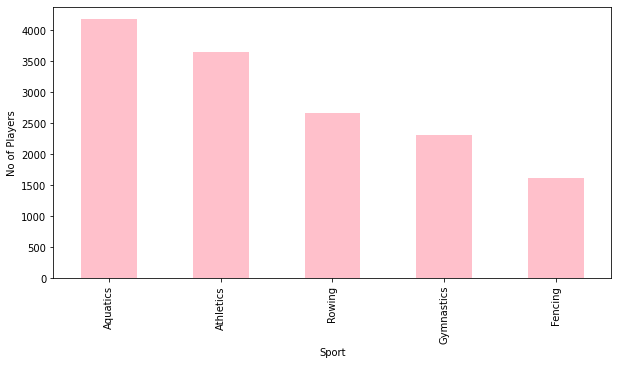

In [32]:
px = athl.head().plot.bar(x='Sport',y='q',figsize=(10,5),color='Pink')
px.set_ylabel('No of Players')

## **8. Which sport is having most female Gold Medalists?** 

***Using Gold_medal dataframe and selecting female players***

In [33]:
female = Gold_medals[Gold_medals['Gender']=='Women']

In [34]:
female.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
417,1900,Paris,Golf,Golf,"ABBOTT, Margaret Ives",USA,Women,Individual,1
641,1900,Paris,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,Mixed Doubles,1
649,1900,Paris,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,Singles,1
710,1904,St Louis,Archery,Archery,"HOWELL, Matilda Scott",USA,Women,Double Columbia Round (50Y - 40Y - 30Y),1
713,1904,St Louis,Archery,Archery,"HOWELL, Matilda Scott",USA,Women,Double National Round (60Y - 50Y),1


In [35]:
noofwomen =female.groupby('Sport')['Medal'].count().sort_values(ascending=False)
noofwomen.head()

Sport
Aquatics      589
Athletics     389
Gymnastics    268
Rowing        217
Volleyball    166
Name: Medal, dtype: int64

In [36]:
z = female.groupby('Sport')['Medal'].count()

***Plotting Top 5***

Text(0, 0.5, 'No of Gold medals')

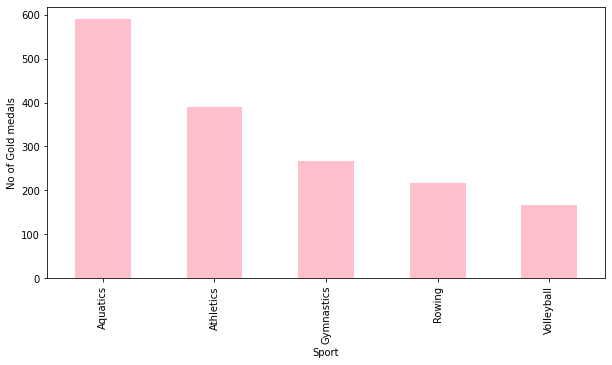

In [37]:
qx = noofwomen.head().plot.bar(x='Sport',y='z',figsize=(10,5),color='Pink')
qx.set_ylabel('No of Gold medals')